# Importation

In [1]:
#Standard libraries for data analysis:
    
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.stats import norm, skew
from scipy import stats
import statsmodels.api as sm
import seaborn as sns

# sklearn modules for data preprocessing:

from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

#sklearn modules for Model Selection:

from sklearn import svm, tree, linear_model, neighbors
from sklearn import naive_bayes, ensemble, discriminant_analysis, gaussian_process
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

#sklearn modules for Model Evaluation & Improvement:
    
from sklearn.metrics import confusion_matrix, accuracy_score 
from sklearn.metrics import f1_score, precision_score, recall_score, fbeta_score
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import KFold
from sklearn import feature_selection
from sklearn import model_selection
from sklearn import metrics
from sklearn.metrics import classification_report, precision_recall_curve
from sklearn.metrics import auc, roc_auc_score, roc_curve
from sklearn.metrics import make_scorer, recall_score, log_loss
from sklearn.metrics import average_precision_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.model_selection import learning_curve
from xgboost import XGBClassifier

#Standard libraries for data visualization:

import seaborn as sn
from matplotlib import pyplot
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
import matplotlib 
%matplotlib inline
color = sn.color_palette()
import matplotlib.ticker as mtick
from IPython.display import display
pd.options.display.max_columns = None
from pandas.plotting import scatter_matrix
from sklearn.metrics import roc_curve

#Miscellaneous Utilitiy Libraries:
    
import random
import os
import re
import sys
import timeit
import string
import time
from datetime import datetime
from time import time
from dateutil.parser import parse
import joblib

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


# Drive

In [2]:
from google.colab import drive
drive.mount('drive/')

Mounted at drive/


In [3]:
os.chdir('/content/drive/MyDrive')

In [4]:
df = pd.read_csv('Churn Modeling.csv')

In [5]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [6]:
df.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [7]:
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [8]:
df.shape

(10000, 14)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


# Data cleaning

In [10]:
df.isna().any()

RowNumber          False
CustomerId         False
Surname            False
CreditScore        False
Geography          False
Gender             False
Age                False
Tenure             False
Balance            False
NumOfProducts      False
HasCrCard          False
IsActiveMember     False
EstimatedSalary    False
Exited             False
dtype: bool

In [11]:
df.Exited.value_counts()

0    7963
1    2037
Name: Exited, dtype: int64

In [12]:
df.isna().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [13]:
df.Exited.value_counts()

0    7963
1    2037
Name: Exited, dtype: int64

In [14]:
df.dtypes

RowNumber            int64
CustomerId           int64
Surname             object
CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

In [15]:
df.drop(['RowNumber','CustomerId','Surname'], axis=1, inplace=True)

In [16]:
df

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


## Analyse Exploratoire

In [17]:
# Vérification de la relation entre le désabonnement, le genre et la localisation(geography) du client
df[['Geography','Gender','Exited']].groupby(['Geography','Gender']).agg(['mean','count'])

Exited      
                      mean count
Geography Gender                
France    Female  0.203450  2261
          Male    0.127134  2753
Germany   Female  0.375524  1193
          Male    0.278116  1316
Spain     Female  0.212121  1089
          Male    0.131124  1388

On observe que le sexe feminin est plus susceptible de se désabonner que le sexe masculin
On voit aussi que le taux de désabonements(d'attrition) est plus élevé en Allemagne qu'en France et en Espagne

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


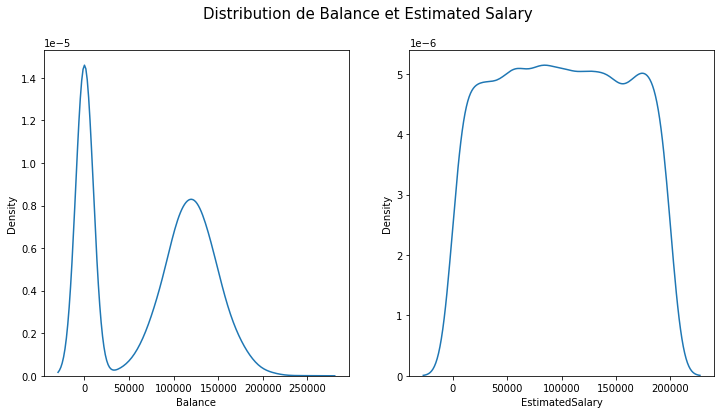

In [18]:
# Vérification de la distribution des variables avec des plots, histogrammes et boxplots

fig , axs = plt.subplots(ncols=2, figsize=(12,6))
fig.suptitle("Distribution de Balance et Estimated Salary", fontsize=15)
sns.distplot(df.Balance, hist=False, ax=axs[0])
sns.distplot(df.EstimatedSalary, hist=False, ax=axs[1])

On voit que la plupart des clients a un solde nul et pour le reste des clients on observe une distribution normale de leur solde.

In [19]:
# Création d'une nouveau feature qui indique si le client a un solde nul ou non
df['Balance_binary'] = df['Balance'].where(df['Balance'] == 0, 1)
df['Balance_binary'].value_counts()

1.0    6383
0.0    3617
Name: Balance_binary, dtype: int64

In [20]:
# Vérification de la corélation entre solde nul et désabonnement
df[['Balance_binary','Exited']].groupby('Balance_binary').mean()

,Exited
Balance_binary,
0.0,0.138236
1.0,0.240796


On observe que les clients avec un solde nul sont moins susceptibles de se désabonner
Autrement dit environ 14% des clients qui ont un solde nul reste abonnés et d'un autre coté 24% des clients qui ont un solde non nul se désabonnent

# Visualisation des Données

In [21]:
#Stacked histogramme basé sur Age
#figure = plt.figure(figsize=(15,8))
#plt.hist([
        #df[(df.Exited==0)]['Age'],
        #df[(df.Exited==1)]['Age']
       # ], 
        # stacked=True, color = ['grey','r'],
         #bins = 'auto',label = ['Stayed','Exited'],
         #edgecolor='black', linewidth=1.2)
#plt.xlabel('Age (years)')
#plt.ylabel('NumOfProducts')
#plt.legend()

Analyse exploratoire des variables catégorielles

In [21]:
cat = ["Geography","Gender","Tenure","NumOfProducts","HasCrCard","IsActiveMember","Exited"]

In [22]:
def category(variable):
    print(df[variable].value_counts())
    
    sns.countplot(df[variable])
    plt.show()

France     5014
Germany    2509
Spain      2477
Name: Geography, dtype: int64


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


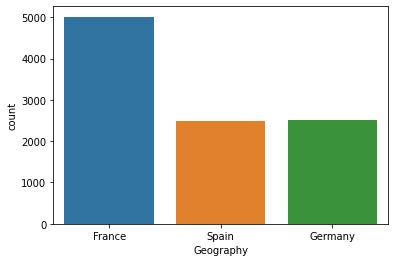

Male      5457
Female    4543
Name: Gender, dtype: int64


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


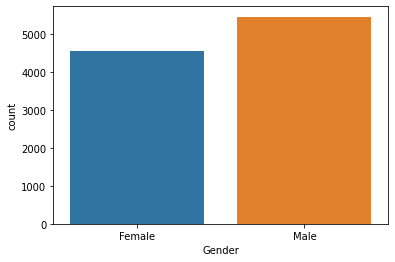

2     1048
1     1035
7     1028
8     1025
5     1012
3     1009
4      989
9      984
6      967
10     490
0      413
Name: Tenure, dtype: int64


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


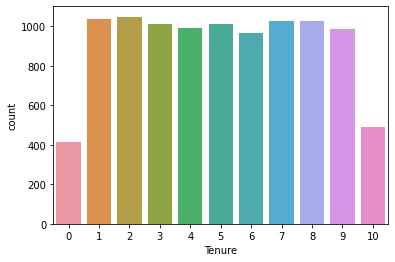

1    5084
2    4590
3     266
4      60
Name: NumOfProducts, dtype: int64


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


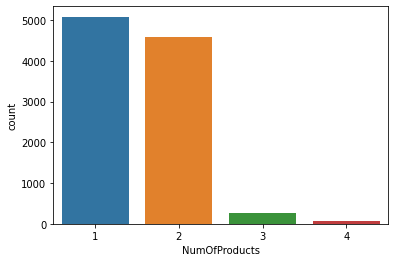

1    7055
0    2945
Name: HasCrCard, dtype: int64


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


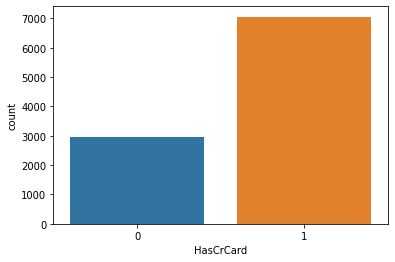

1    5151
0    4849
Name: IsActiveMember, dtype: int64


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


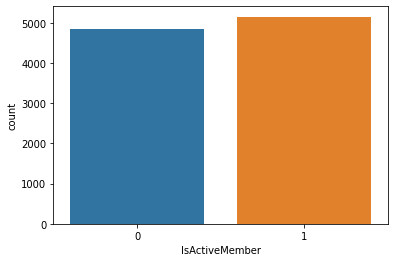

0    7963
1    2037
Name: Exited, dtype: int64


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


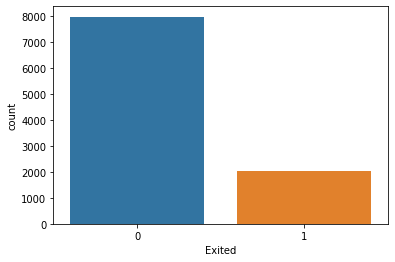

In [23]:
for variable in cat : 
  category(variable)

- On observe que les clients résident majoritairement en France, le nombre de clients résidant en Allemagne et en Espagne est très proche. - Le sexe des clients est majoritairement masculin mais leur nombre est proche, on peut donc dire que c'est une variable équilibrée?. - Nous observons que les clients sont en général client de la banque de 1 á 9(ans/mois) [année ou mois? à clarifier...]. - Les clients achètent généralement 1 et 2 produits, il y a une forte diminution du nombre de clients qui ont achetés plus de 2 produits. Une répartition déséquilibrée?. - Les clients détiennent généralement des cartes de crédit. - Les clients utilisent la banque plus activement

Analyse exploratoire des varialbles numériques

In [24]:
num = ["CreditScore", "Age", "Balance", "EstimatedSalary" ]

In [25]:
def numeric(variable):
    
    plt.hist(df[variable], bins = 20, color = "green")
    plt.xlabel(variable)
    plt.ylabel("Frequency")
    plt.title("{} variable distribution".format(variable))
    plt.show()

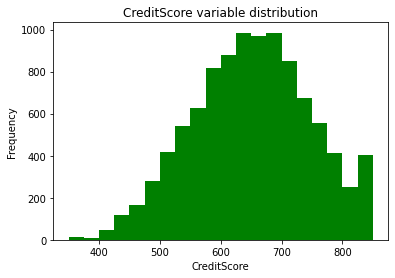

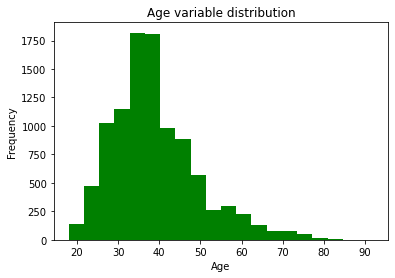

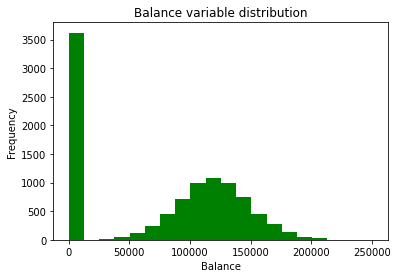

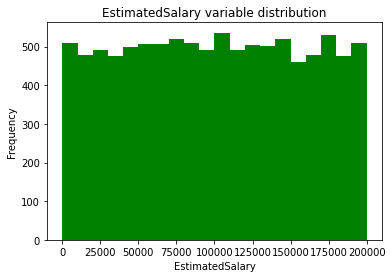

In [26]:
for variable in num : 
  numeric(variable)

Effet des variables catégorielles sur la variable dépendante("Exited")

In [27]:
cat_eft = ["Geography","Gender","Tenure","NumOfProducts","HasCrCard","IsActiveMember"]

In [28]:
def category_eft(variable):
    
    print("{} effet de la variable sur le désabonnement du client : \n".format(variable))
    print(df.groupby(variable)["Exited"].mean())
    
    sns.countplot(y = variable, hue = "Exited" , data = df)
    plt.show()

Geography effet de la variable sur le désabonnement du client : 

Geography
France     0.161548
Germany    0.324432
Spain      0.166734
Name: Exited, dtype: float64


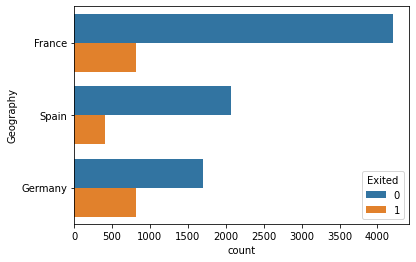

Gender effet de la variable sur le désabonnement du client : 

Gender
Female    0.250715
Male      0.164559
Name: Exited, dtype: float64


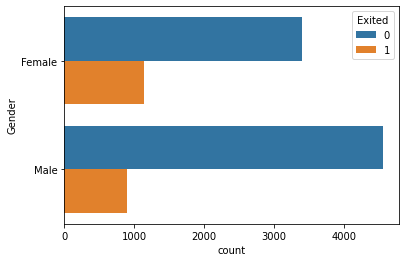

Tenure effet de la variable sur le désabonnement du client : 

Tenure
0     0.230024
1     0.224155
2     0.191794
3     0.211100
4     0.205258
5     0.206522
6     0.202689
7     0.172179
8     0.192195
9     0.216463
10    0.206122
Name: Exited, dtype: float64


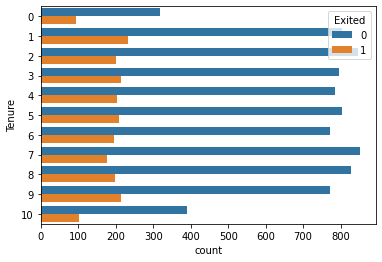

NumOfProducts effet de la variable sur le désabonnement du client : 

NumOfProducts
1    0.277144
2    0.075817
3    0.827068
4    1.000000
Name: Exited, dtype: float64


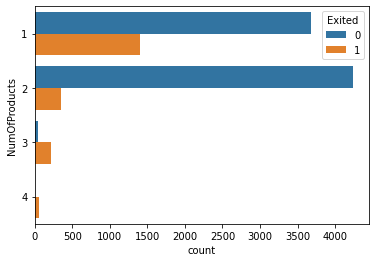

HasCrCard effet de la variable sur le désabonnement du client : 

HasCrCard
0    0.208149
1    0.201843
Name: Exited, dtype: float64


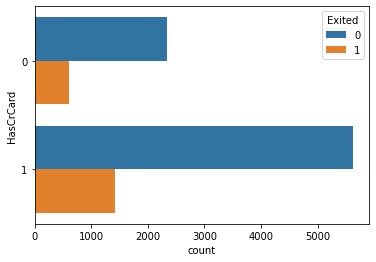

IsActiveMember effet de la variable sur le désabonnement du client : 

IsActiveMember
0    0.268509
1    0.142691
Name: Exited, dtype: float64


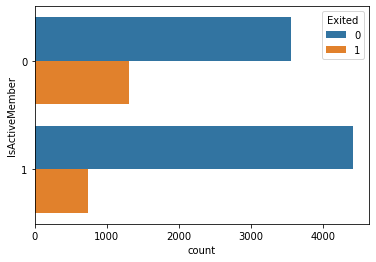

In [29]:
for variable in cat_eft:
    category_eft(variable)

Quelques Insights : 
. La perte moyenne de clients est la plus élevée en Allemagne
. Les femmes quittent le plus souvent la banque
. On observe que les clients qui achètent plus de 2 produits ont un taux de désabonnement très élevé Tous les clients ayant acheté 4 produits ont quitté la banque
. Les clients qui n'utilisent pas activement la banque quittent le plus la banque

Matrice de correlation

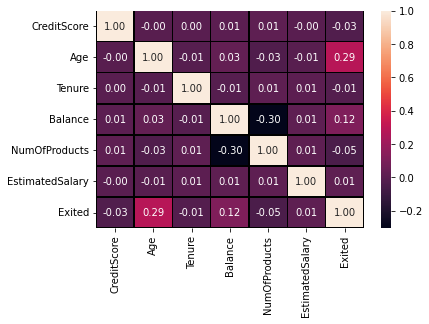

In [30]:
lst_cor = ["CreditScore","Age","Tenure","Balance","NumOfProducts","EstimatedSalary","Exited"]
sns.heatmap(df[lst_cor].corr(), annot = True, linecolor = "black", lw = 0.5, fmt= '.2f') 

. Nous observons que la variable "Age" a une forte correlation(0.29) avec la variable cible"Exited". Nous pouvons donc dire que plus l'age augmente plus le taux de désabonnement du client est élevé. On observe aussi que "Exited" et "Balance" ont une correlation relativement forte(0.12). Et enfin on observe que "Exited" et "NumOfProducts" ont une correlation modérement forte(-0.05) relation négative

Effet des variables numériques sur la variable dépendante("Exited")

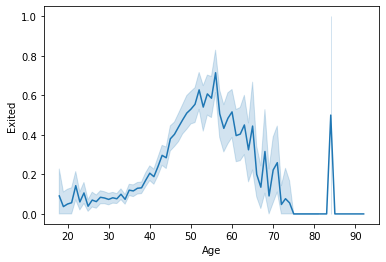

In [31]:
#Age - Exited
sns.lineplot(x = "Age", y = "Exited", data = df);

In [32]:
df.groupby(df["Exited"])["Age"].mean()

Exited
0    37.408389
1    44.837997
Name: Age, dtype: float64

. Comme observé avec la matrice de correlation nous remarquons ici encore une fois de plus que plus l'age du client augmente plus il est susceptible au désabonement.
. L'age moyen des clients qui ne se désabonnent de la banque est de 37 ans
. L'age moyen des clients qui se désabonnent de la banque est d'environ 45 ans

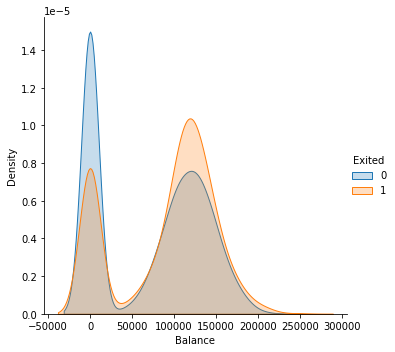

In [33]:
#Balance - Exited
(sns.FacetGrid(df, hue = "Exited", height = 5).map(sns.kdeplot, "Balance", shade= True).add_legend());

In [34]:
df.groupby(df["Exited"])["Balance"].mean()

Exited
0    72745.296779
1    91108.539337
Name: Balance, dtype: float64

- On observe que les clients avec un solde de compte nul ne se désabonnent pas de la banque. Par contre les clients avec un solde de compte entre 5000 et 20000 se désabonnent de la banque.- La moyenne des soldes de comptes clients qui ne se désabonnent pas de la banque est : 72745. - La moyenne des soldes de comptes clients qui se désabonnent est : 91108

Feature engineering

In [35]:
#Dummies
df["NumOfProducts"] = df["NumOfProducts"].astype("category")
df["HasCrCard"] = df["HasCrCard"].astype("category")
df["IsActiveMember"] = df["IsActiveMember"].astype("category")

df = pd.get_dummies(df, columns = ["Geography"])
df = pd.get_dummies(df, columns = ["Gender"])
df = pd.get_dummies(df, columns = ["NumOfProducts"])
df = pd.get_dummies(df, columns = ["HasCrCard"])
df = pd.get_dummies(df, columns = ["IsActiveMember"])

In [36]:
df.head()

,CreditScore,Age,Tenure,Balance,EstimatedSalary,Exited,Balance_binary,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male,NumOfProducts_1,NumOfProducts_2,NumOfProducts_3,NumOfProducts_4,HasCrCard_0,HasCrCard_1,IsActiveMember_0,IsActiveMember_1
0,619,42,2,0.00,101348.88,1,0.0,1,0,0,1,0,1,0,0,0,0,1,0,1
1,608,41,1,83807.86,112542.58,0,1.0,0,0,1,1,0,1,0,0,0,1,0,0,1
2,502,42,8,159660.80,113931.57,1,1.0,1,0,0,1,0,0,0,1,0,0,1,1,0
3,699,39,1,0.00,93826.63,0,0.0,1,0,0,1,0,0,1,0,0,1,0,1,0
4,850,43,2,125510.82,79084.10,0,1.0,0,0,1,1,0,1,0,0,0,0,1,0,1


En examinant les relations entre les variables nous remarquons que la variable "Tenure" n'a aucun effet sur la variable cible "Exited" nous allons tout simplement supprimer la colonne "Tenure" du dataset.

In [37]:
#Suppression de la colonne "Tenure"
df.drop(["Tenure"], axis = 1 , inplace = True)

Future Scaling

In [38]:
# Les variables de notre dataset ne sont pas stables. Nous allons effectuer une normalisation
x_df = df.drop(["Exited"], axis=1)
y = df["Exited"]

x = (x_df - np.min(x_df)) / (np.max(x_df)-np.min(x_df)).values
x.head()

,CreditScore,Age,Balance,EstimatedSalary,Balance_binary,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male,NumOfProducts_1,NumOfProducts_2,NumOfProducts_3,NumOfProducts_4,HasCrCard_0,HasCrCard_1,IsActiveMember_0,IsActiveMember_1
0,0.538,0.324324,0.000000,0.506735,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
1,0.516,0.310811,0.334031,0.562709,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
2,0.304,0.324324,0.636357,0.569654,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0
3,0.698,0.283784,0.000000,0.469120,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
4,1.000,0.337838,0.500246,0.395400,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0


Train-Test Split

In [39]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.20, random_state = 42)

# Modélisation


Logistic Regression

In [40]:
#Modèle & Prediction
clfr = LogisticRegression()
clfr.fit(x_train, y_train)
clfr

LogisticRegression()

In [41]:
clfr.coef_

array([[-0.34471599,  4.90375361,  0.30761142,  0.02545655, -0.32386978,
        -0.3619876 ,  0.62060365, -0.25864439,  0.26206309, -0.26209143,
        -1.18258089, -2.73661071,  1.47501452,  2.44414875,  0.01762116,
        -0.01764949,  0.5341946 , -0.53422293]])

In [42]:
y_pred = clfr.predict(x_test)
y_true = y_test

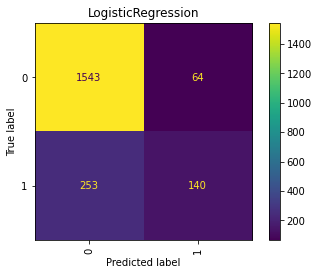

In [43]:

cm = confusion_matrix(y_true, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(xticks_rotation='vertical')
plt.title('LogisticRegression')
plt.show()




In [44]:
metrics.accuracy_score(y_true, y_pred)

0.8415

 Model Tuning

In [45]:
#Crossvalidation
cross_val_score(clfr, x_test, y_test, cv=10).mean()

0.8424999999999999

XGBoost

In [46]:
#Modèle & Prédiction
clfxgb = XGBClassifier()
clfxgb.fit(x_train,y_train)

XGBClassifier()

In [47]:
y_pred = clfxgb.predict(x_test)
y_true = y_test

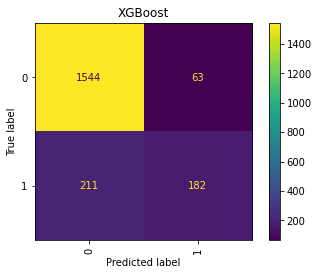

In [48]:
#Matrice de confusion

cm = confusion_matrix(y_true, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(xticks_rotation='vertical')
plt.title('XGBoost')
plt.show()

In [51]:
metrics.accuracy_score(y_true, y_pred)

0.863

KNN

In [52]:
#Modèle & Prédiction
knn = KNeighborsClassifier()
knn_model = knn.fit(x_train,y_train)
knn_model

KNeighborsClassifier()

In [53]:
y_pred = knn_model.predict(x_test)

Model tuning

Recherche des valeurs optimales des hyper-paramètres

In [54]:
knn_params = {"n_neighbors": np.arange(1,50)}

In [55]:
knn = KNeighborsClassifier()
knn_cv = GridSearchCV(knn, knn_params, cv=10) #nbre split 10
knn_cv.fit(x_train, y_train)

GridSearchCV(cv=10, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49])})

In [56]:
print("Le meilleur paramètre: " + str(knn_cv.best_params_))

Le meilleur paramètre: {'n_neighbors': 6}


In [57]:
knn = KNeighborsClassifier(6)
knn_model = knn.fit(x_train, y_train)

In [58]:
y_pred = knn_model.predict(x_test)

In [59]:
y_true = y_test

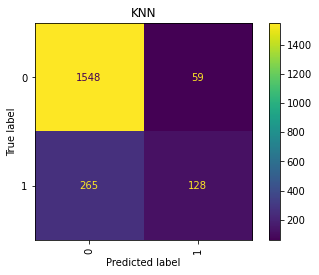

In [60]:
cm = confusion_matrix(y_true, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(xticks_rotation='vertical')
plt.title('KNN')
plt.show()



In [61]:
metrics.accuracy_score(y_true, y_pred)

0.838

Random Forest

In [62]:
#Modèle & Prédiction
rf_model = RandomForestClassifier().fit(x_train, y_train)
y_pred = rf_model.predict(x_test)

Model Tuning

In [63]:
rf_params = {"max_depth": [2,5,8,10],
            "max_features": [2,5,8],
            "n_estimators": [10,500,1000],
            "min_samples_split": [2,5,10]}

In [64]:
rf_model = RandomForestClassifier()

rf_cv_model = GridSearchCV(rf_model, 
                           rf_params, 
                           cv = 10, 
                           n_jobs = -1, 
                           verbose = 2) 

In [65]:
rf_cv_model.fit(x_train, y_train)

Fitting 10 folds for each of 108 candidates, totalling 1080 fits


GridSearchCV(cv=10, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [2, 5, 8, 10], 'max_features': [2, 5, 8],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [10, 500, 1000]},
             verbose=2)

In [66]:
print("Les meilleurs paramètres : " + str(rf_cv_model.best_params_))

Les meilleurs paramètres : {'max_depth': 10, 'max_features': 8, 'min_samples_split': 10, 'n_estimators': 500}


In [67]:
rf_tuned = RandomForestClassifier(max_depth = 10, 
                                  max_features = 5, 
                                  min_samples_split = 5,
                                  n_estimators = 1000)

rf_tuned.fit(x_train, y_train)

RandomForestClassifier(max_depth=10, max_features=5, min_samples_split=5,
                       n_estimators=1000)

In [68]:
y_pred = rf_tuned.predict(x_test)

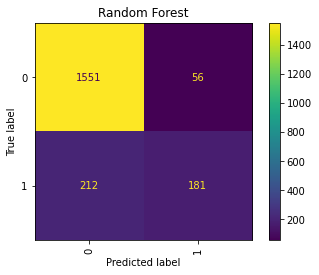

In [69]:
y_true = y_test


cm = confusion_matrix(y_true, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(xticks_rotation='vertical')
plt.title('Random Forest')
plt.show()

In [70]:
metrics.accuracy_score(y_test, y_pred)

0.866

#Comparaison des modèles

In [71]:
models = [
    clfr,
    rf_tuned,
    knn_model,
    clfxgb,
     
        ]


for model in models:
    names = model.__class__.__name__
    y_pred = model.predict(x_test)
    accuracy = accuracy_score(y_test, y_pred)
    print("-"*28)
    print(names + ":" )
    print("Accuracy: {:.4%}".format(accuracy))

----------------------------
LogisticRegression:
Accuracy: 84.1500%
----------------------------
RandomForestClassifier:
Accuracy: 86.6000%
----------------------------
KNeighborsClassifier:
Accuracy: 83.8000%
----------------------------
XGBClassifier:
Accuracy: 86.3000%


Learning Curve

[ 640 1280 1920 2560 3200 3840 4480 5120 5760 6400]


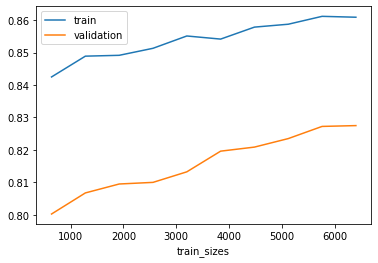

In [72]:
N, train_score, val_score = learning_curve(knn_model, x_train, y_train, train_sizes = np.linspace(0.1, 1.0, 10), cv = 5)

print(N)
plt.plot(N, train_score.mean(axis = 1), label = 'train')
plt.plot(N, val_score.mean(axis = 1), label = 'validation')
plt.xlabel('train_sizes')
plt.legend()

La courbe ROC

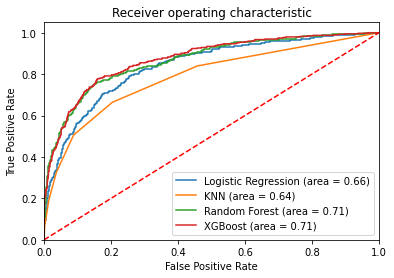

In [78]:
logistic_roc_auc = roc_auc_score(y_test, clfr.predict(x_test))
fpr, tpr, thresholds = roc_curve(y_test, clfr.predict_proba(x_test)[:,1])

knn_roc_auc = roc_auc_score(y_test, knn_model.predict(x_test))
knn_fpr, knn_tpr, knn_thresholds = roc_curve(y_test, knn_model.predict_proba(x_test)[:,1])

rf_roc_auc = roc_auc_score(y_test, rf_tuned.predict(x_test))
rf_fpr, rf_tpr, rf_thresholds = roc_curve(y_test, rf_tuned.predict_proba(x_test)[:,1])

xgb_roc_auc = roc_auc_score(y_test, clfxgb.predict(x_test))
xgb_fpr, xgb_tpr, xgb_thresholds = roc_curve(y_test, clfxgb.predict_proba(x_test)[:,1])


plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logistic_roc_auc)
plt.plot(knn_fpr, knn_tpr, label='KNN (area = %0.2f)' % knn_roc_auc)
plt.plot(rf_fpr, rf_tpr, label='Random Forest (area = %0.2f)' % rf_roc_auc)
plt.plot(xgb_fpr,xgb_tpr, label='XGBoost (area = %0.2f)' % xgb_roc_auc)

plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()


Les modèles Random Forest & XGBoost semblent les plus performants car ils produisent les meilleurs scores : 0.71 